# FIFA ULTIMATE TEAM PLAYERS ANALYSIS

Thành viên: 
- 1753022 - Đặng Viết Khôi Nguyên
- 18127229 - Lê Minh Tiến

<img src="../imgs/banner_width.jpg" width="1000"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram') # Để trực quan hóa pipeline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/FUT.csv')
df.head()

,commonName,firstName,lastName,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
0,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
1,NaN,Luka,Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
2,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
3,NaN,Lionel,Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
4,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99


In [4]:
df.shape

(21792, 60)

In [5]:
df['fullName'] = df['firstName'] + ' ' + df['lastName']
cols = df.columns.to_list()
new_cols = cols[-1:] + cols[3:-1]
new_df = df[new_cols]
new_df

,fullName,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
0,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
1,Luka Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
2,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
3,Lionel Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
4,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21787,Xin Wang,RWB,33,182,70,11/10/1997,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,NaN,NaN,High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 61, 'c...",Wang Xin,0,False,bronze,False,Right Wing Back,242852,242852,48
21788,Lei Wu,CDM,39,184,72,07/01/1997,24,64,54,55,53,40,Right,2,52,41,45,29,32,8,15,11,8,5,41,40,57,44,34,52,46,53,58,48,50,52,49,57,40,56,62,45,30,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 60, 'c...",Wu Lei,0,False,bronze,False,Centre Defensive Midfielder,243112,243112,48
21789,Morgan Roberts,LM,47,178,68,12/22/2000,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,NaN,NaN,Medium,Low,"[{'name': 'fut.attribute.PAC', 'value': 65, 'c...",Roberts,0,False,bronze,False,Left Midfielder,243204,243204,48
21790,Callum Hawkins,GK,37,188,75,12/12/1999,21,22,18,25,38,16,Left,1,13,13,14,9,11,53,45,56,49,46,10,6,47,15,5,16,15,5,65,35,24,20,12,31,10,22,41,30,6,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.DIV', 'value': 53, 'c...",Hawkins,0,False,bronze,True,Goalkeeper,243636,243636,48


In [6]:
new_df.duplicated(subset='fullName').sum()

6267

In [7]:
new_df = new_df.drop_duplicates(subset='fullName', keep='first')
new_df = new_df.set_index('fullName')
new_df

,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
Luka Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
Lionel Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
Edson Arantes Nascimento,CAM,98,173,70,10/23/1940,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,"['Solid Player', 'Leadership', 'Finesse Shot',...","['Speedster', 'Aerial Threat', 'Dribbler', 'Pl...",High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 95, 'c...",Pelé,12,True,gold,False,Centre Attacking Midfielder,237067,237067,98
Neymar da Silva Santos Jr.,CAM,97,175,68,02/05/1992,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,"['Flair', 'Speed Dribbler (CPU AI Only)', 'Tec...","['Speedster', 'Aerial Threat', 'Dribbler', 'Pl...",High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 98, 'c...",Neymar Jr,66,False,gold,False,Centre Attacking Midfielder,151185815,190871,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,CM,43,189,75,11/27/1999,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 63, 'c...",Liu Guobo,0,False,bronze,False,Centre Midfielder,242696,242696,48
Xin Wang,RWB,33,182,70,11/10/1997,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,NaN,NaN,High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 61, 'c...",Wang Xin,0,False,bronze,False,Right Wing Back,242852,242852,48
Morgan Roberts,LM,47,178,68,12/22/2000,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,NaN,NaN,Medium,Low,"[{'name': 'fut.attribute.PAC', 'value': 65, 'c...",Roberts,0,False,bronze,False,Left Midfielder,243204,243204,48


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15525 entries, C. Ronaldo dos Santos Aveiro to Mads Frøkjær-Jensen
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          15525 non-null  object
 1   composure         15525 non-null  int64 
 2   height            15525 non-null  int64 
 3   weight            15525 non-null  int64 
 4   birthdate         15525 non-null  object
 5   age               15525 non-null  int64 
 6   acceleration      15525 non-null  int64 
 7   aggression        15525 non-null  int64 
 8   agility           15525 non-null  int64 
 9   balance           15525 non-null  int64 
 10  ballcontrol       15525 non-null  int64 
 11  foot              15525 non-null  object
 12  skillMoves        15525 non-null  int64 
 13  crossing          15525 non-null  int64 
 14  curve             15525 non-null  int64 
 15  dribbling         15525 non-null  int64 
 16  finishing         1552

In [9]:
exclude = ['birthdate', 'traits', 'specialities', 'attributes', 'name', 'quality', 'positionFull',\
           'isIcon', 'isGK', 'rarityId', 'id', 'baseId']

In [10]:
tuned_df = new_df.drop(columns=exclude)
tuned_df

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,ST,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,CM,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,CF,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,CAM,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,CAM,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,CM,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,RWB,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,LM,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


Kiểm tra giá trị thiếu

In [11]:
tuned_df.isna().sum()

position            0
composure           0
height              0
weight              0
age                 0
acceleration        0
aggression          0
agility             0
balance             0
ballcontrol         0
foot                0
skillMoves          0
crossing            0
curve               0
dribbling           0
finishing           0
freekickaccuracy    0
gkdiving            0
gkhandling          0
gkkicking           0
gkpositioning       0
gkreflexes          0
headingaccuracy     0
interceptions       0
jumping             0
longpassing         0
longshots           0
marking             0
penalties           0
positioning         0
potential           0
reactions           0
shortpassing        0
shotpower           0
slidingtackle       0
sprintspeed         0
standingtackle      0
stamina             0
strength            0
vision              0
volleys             0
weakFoot            0
atkWorkRate         0
defWorkRate         0
rating              0
dtype: int

In [12]:
tuned_df.describe()

,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,rating
count,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.00000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.00000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000
mean,60.093462,181.430274,75.510016,28.788019,65.411916,57.267762,64.707762,64.547182,59.66847,2.378808,51.067826,48.529533,56.487536,46.758068,44.047729,16.709243,16.491208,16.31942,16.494557,16.828921,53.334171,47.929662,66.337842,54.075813,48.539903,48.445346,49.492882,51.292238,71.638003,63.128567,60.105958,56.945250,46.535395,65.572303,48.763092,64.635233,66.843349,54.759678,44.130306,2.971916,67.554525
std,12.041737,6.746351,7.096483,4.851780,15.345977,17.786579,15.295760,14.651682,17.35612,0.763828,19.200822,19.385463,19.535321,20.526062,18.423438,18.060724,17.212777,16.77973,17.385398,18.291418,18.230877,21.046664,12.475209,15.937159,20.257754,20.053881,16.664139,20.564851,6.392439,9.865246,15.556864,18.323736,21.685071,15.132410,22.045800,16.518023,12.664097,15.097733,18.782862,0.666483,8.039307
min,3.000000,155.000000,50.000000,20.000000,13.000000,10.000000,14.000000,16.000000,5.00000,1.000000,5.000000,6.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,5.000000,15.000000,9.000000,3.000000,3.000000,5.000000,2.000000,48.000000,30.000000,7.000000,2.000000,3.000000,12.000000,2.000000,12.000000,24.000000,10.000000,4.000000,1.000000,48.000000
25%,53.000000,177.000000,70.000000,25.000000,57.000000,45.000000,56.000000,56.000000,55.00000,2.000000,39.000000,35.000000,50.000000,30.000000,31.000000,8.000000,8.000000,8.00000,8.000000,8.000000,45.000000,27.000000,59.000000,44.000000,33.000000,31.000000,39.000000,39.000000,67.000000,57.000000,54.000000,46.000000,25.000000,57.000000,28.000000,58.000000,60.000000,45.000000,31.000000,3.000000,63.000000
50%,60.000000,182.000000,75.000000,28.000000,68.000000,60.000000,67.000000,66.000000,64.00000,2.000000,55.000000,50.000000,62.000000,50.000000,42.000000,11.000000,11.000000,11.00000,11.000000,11.000000,56.000000,54.000000,67.000000,57.000000,52.000000,54.000000,50.000000,56.000000,71.000000,63.000000,63.000000,60.000000,53.000000,68.000000,56.000000,68.000000,68.000000,56.000000,45.000000,3.000000,67.000000
75%,68.000000,186.000000,80.000000,32.000000,76.000000,70.000000,75.000000,75.000000,70.00000,3.000000,65.000000,63.000000,69.000000,63.000000,58.000000,14.000000,14.000000,14.00000,14.000000,14.000000,65.000000,65.000000,75.000000,65.000000,64.000000,64.000000,61.000000,65.000000,76.000000,69.000000,69.000000,70.000000,64.000000,76.000000,66.000000,75.000000,75.000000,65.000000,58.000000,3.000000,72.000000
max,99.000000,205.000000,110.000000,91.000000,99.000000,99.000000,99.000000,99.000000,99.00000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000,95.00000,96.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.000000,99.000000


In [13]:
tuned_df.position.unique()

array(['ST', 'CM', 'CF', 'CAM', 'LW', 'CB', 'GK', 'RW', 'CDM', 'RM', 'LM',
       'RB', 'LB', 'RWB', 'LWB', 'RF', 'LF'], dtype=object)

In [14]:
tuned_df.atkWorkRate.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [15]:
tuned_df.defWorkRate.unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [16]:
pos_df = new_df.groupby(['position', 'positionFull']).size().reset_index()
pos_df.columns = ['Position', 'Long form', 'Number of players']
pos_df

,Position,Long form,Number of players
0,CAM,Centre Attacking Midfielder,867
1,CB,Centre Back,2672
2,CDM,Centre Defensive Midfielder,1244
3,CF,Centre Forward,90
4,CM,Centre Midfielder,1894
5,GK,Goalkeeper,1718
6,LB,Left Back,1147
7,LF,Left Forward,3
8,LM,Left Midfielder,910
9,LW,Left Wing,313


In [17]:
pos_series = new_df['position'].value_counts(normalize=True) * 100
pos_series

CB     17.210950
ST     14.170692
CM     12.199678
GK     11.066023
CDM     8.012882
LB      7.388084
RB      7.272142
RM      6.099839
LM      5.861514
CAM     5.584541
LW      2.016103
RW      1.842190
CF      0.579710
RWB     0.360709
LWB     0.309179
LF      0.019324
RF      0.006441
Name: position, dtype: float64

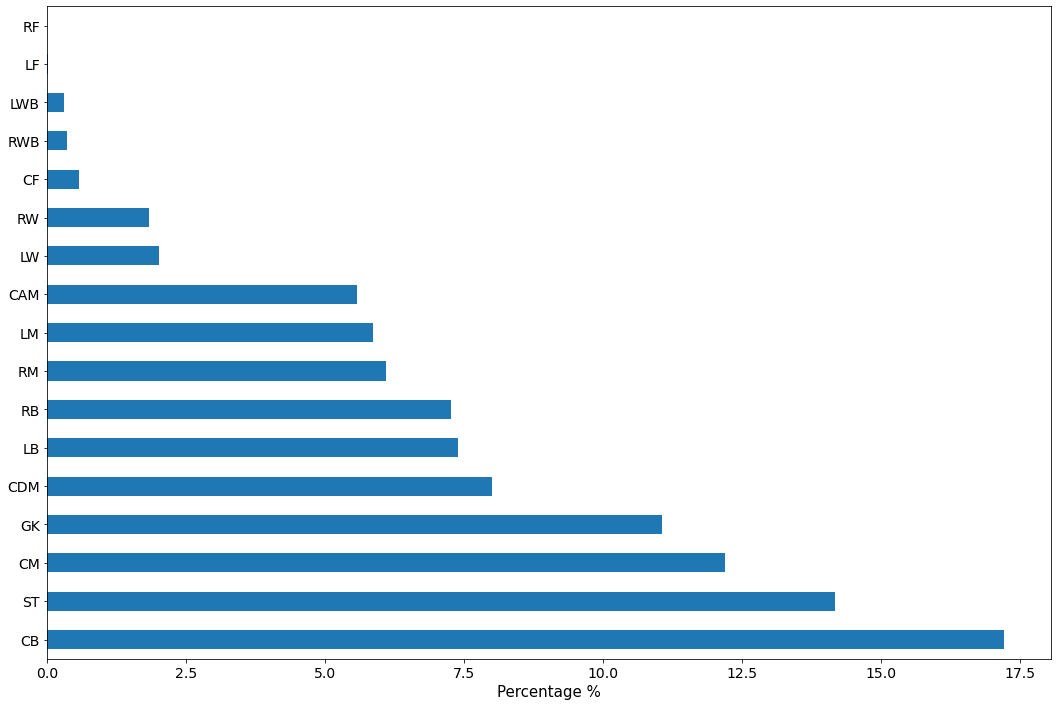

In [18]:
pos_series.plot(kind='barh', figsize=(18, 12), fontsize=14)
plt.xlabel('Percentage %', fontsize=15);

<img src="../imgs/position-defender.jpg" width="400"/>

Quan sát sự tương đồng của 4 vị trí ít phổ biến nhất


In [19]:
RF_index = tuned_df[tuned_df.position == 'RF'].index
LF_index = tuned_df[tuned_df.position == 'LF'].index
LWB_index = tuned_df[tuned_df.position == 'LWB'].index
RWB_index = tuned_df[tuned_df.position == 'RWB'].index

- Change RF -> RW
- Change LF -> LW
- Change LWB -> LB
- Change RWB -> RB

In [20]:
tuned_df.loc[RF_index, 'position'] = 'RW'
tuned_df.loc[LF_index, 'position'] = 'LW'
tuned_df.loc[LWB_index, 'position'] = 'LB'
tuned_df.loc[RWB_index, 'position'] = 'RB'

In [21]:
tuned_df.shape

(15525, 45)

In [22]:
tuned_df.position.unique()

array(['ST', 'CM', 'CF', 'CAM', 'LW', 'CB', 'GK', 'RW', 'CDM', 'RM', 'LM',
       'RB', 'LB'], dtype=object)

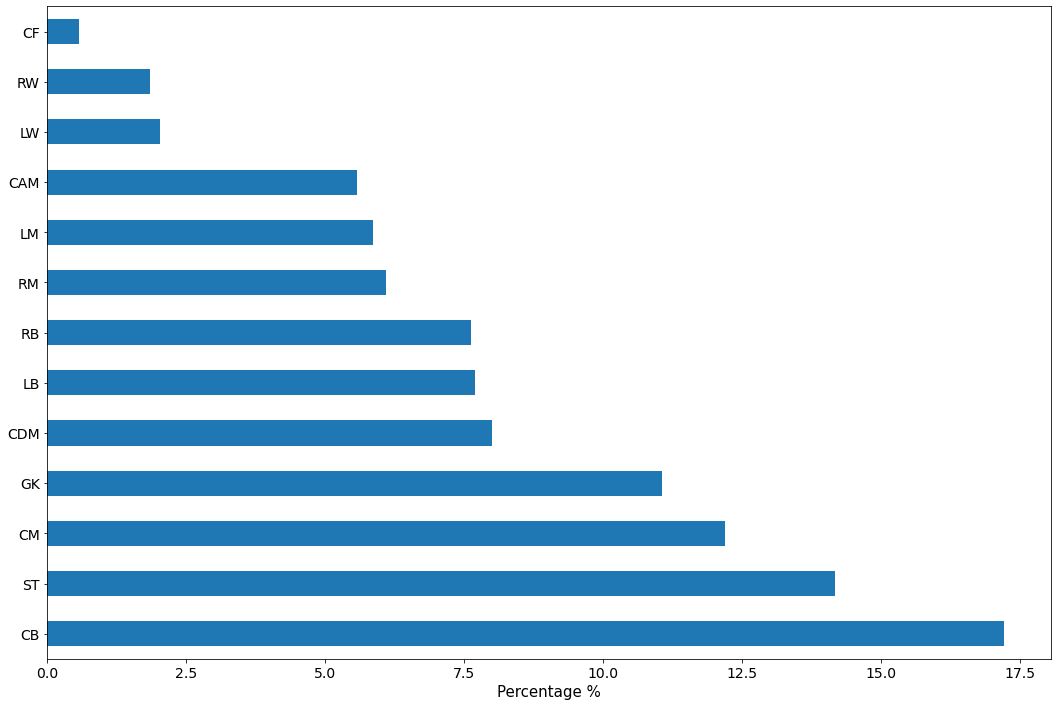

In [23]:
(tuned_df.position.value_counts(normalize=True) * 100).plot(kind='barh', figsize=(18, 12), fontsize=14)
plt.xlabel('Percentage %', fontsize=15);

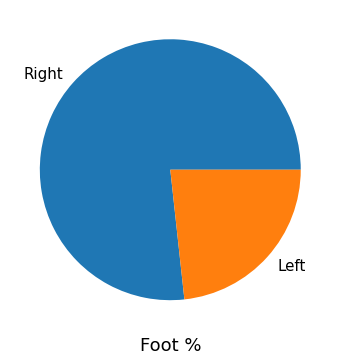

In [24]:
foot_series = tuned_df['foot'].value_counts(normalize=True)
foot_series.plot(kind='pie', figsize=(6, 6), fontsize=15)
plt.xlabel('Foot %', fontsize=18)
plt.ylabel('');

## First problem: Potential position for players

In [25]:
labelEncode = LabelEncoder()
target = labelEncode.fit_transform(tuned_df.position)
target

array([12,  4,  3, ...,  7,  5,  4])

In [26]:
labelEncode.classes_

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'ST'], dtype=object)

In [27]:
labelEncode.inverse_transform([i for i in range(tuned_df.position.unique().shape[0])])

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'ST'], dtype=object)

In [28]:
tuned_data = tuned_df.copy()
tuned_data.position = target
tuned_data

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,12,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,4,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,3,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,0,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,0,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,4,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,9,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,7,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


In [29]:
y = tuned_data.position
X = tuned_data.drop(columns=['position', 'rating'])

In [30]:
X_train_full , X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

### Tiền xử lý tập train

In [32]:
nume_cols = list(X_train.dtypes[X_train.dtypes==np.int64].index)
cat_cols = list(X_train.dtypes[X_train.dtypes==object].index)
print("Numeric columns: ", nume_cols)
print()
print("Categorical columns: ", cat_cols)

Numeric columns:  ['composure', 'height', 'weight', 'age', 'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol', 'skillMoves', 'crossing', 'curve', 'dribbling', 'finishing', 'freekickaccuracy', 'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes', 'headingaccuracy', 'interceptions', 'jumping', 'longpassing', 'longshots', 'marking', 'penalties', 'positioning', 'potential', 'reactions', 'shortpassing', 'shotpower', 'slidingtackle', 'sprintspeed', 'standingtackle', 'stamina', 'strength', 'vision', 'volleys', 'weakFoot']

Categorical columns:  ['foot', 'atkWorkRate', 'defWorkRate']


In [33]:
oneHotCol = ['foot']
ordinalCol = ['atkWorkRate', 'defWorkRate']

In [34]:
X_train.atkWorkRate.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [35]:
X_train.defWorkRate.unique()

array(['Low', 'Medium', 'High'], dtype=object)

Với các biến định lượng thực hiện standardscaler(), với biến định tính foot thực hiện onehotenconding, biến atk và def sử dụng ordinalencoder

In [36]:
preprocess_pipeline = make_column_transformer((StandardScaler(), nume_cols), 
                                              (OneHotEncoder(handle_unknown='ignore'), oneHotCol), 
                                              (OrdinalEncoder(), ordinalCol))
preprocess_pipeline

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['composure', 'height', 'weight', 'age',
                                  'acceleration', 'aggression', 'agility',
                                  'balance', 'ballcontrol', 'skillMoves',
                                  'crossing', 'curve', 'dribbling', 'finishing',
                                  'freekickaccuracy', 'gkdiving', 'gkhandling',
                                  'gkkicking', 'gkpositioning', 'gkreflexes',
                                  'headingaccuracy', 'interceptions', 'jumping',
                                  'longpassing', 'longshots', 'marking',
                                  'penalties', 'positioning', 'potential',
                                  'reactions', ...]),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['foot']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['atkWorkRate', 'defWorkRate'])])

In [37]:
preprocessed_train_X = preprocess_pipeline.fit_transform(X_train)

In [38]:
preprocessed_train_X.shape

(9314, 44)

In [39]:
X_train.shape

(9314, 43)

### Tiền xử lý tập validation

In [40]:
preprocessed_valid_X = preprocess_pipeline.transform(X_valid)

In [41]:
preprocessed_valid_X.shape

(2329, 44)

In [42]:
X_valid.shape

(2329, 43)

In [43]:
classifier = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', random_state=0, max_iter=1000)
alphas = [0.01, 0.1, 1, 10, 100]
net_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('net', classifier)])
best_val_err = float('inf')
best_alpha = None
count = 0
for alp in alphas:
    net_pipeline['net'].set_params(alpha=alp)
    net_pipeline.fit(X_train, y_train)
    train_err = 1 - net_pipeline.score(X_train, y_train)
    valid_err = 1 - net_pipeline.score(X_valid, y_valid)
    if valid_err < best_val_err:
        best_val_err = valid_err
        best_alpha = alp
    count+=1
    print("Finish: ", count)
            
"Finish!"

Finish:  1
Finish:  2
Finish:  3
Finish:  4
Finish:  5


'Finish!'

In [44]:
net_pipeline['net'].set_params(alpha=best_alpha)
net_pipeline['net'].set_params(hidden_layer_sizes=(50,))

MLPClassifier(alpha=1, hidden_layer_sizes=(50,), max_iter=1000, random_state=0)

In [45]:
net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['composure', 'height',
                                                   'weight', 'age',
                                                   'acceleration', 'aggression',
                                                   'agility', 'balance',
                                                   'ballcontrol', 'skillMoves',
                                                   'crossing', 'curve',
                                                   'dribbling', 'finishing',
                                                   'freekickaccuracy',
                                                   'gkdiving', 'gkhandling',
                                                   'gkkicking', 'gkpositioning',
                                                   'gkreflexes',
                                                   'headingaccuracy',
                                                   'interceptions', 'jumping',
                                                   'longpassing', 'longshots',
                                                   'marking', 'penalties',
                                                   'positioning', 'potential',
                                                   'reactions', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['foot']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['atkWorkRate',
                                                   'defWorkRate'])])),
                ('net',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(50,), max_iter=1000,
                               random_state=0))])

In [46]:
net_pipeline.score(X_test, y_test)

0.7398248325605358

In [47]:
knn_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('knn', KNeighborsClassifier())])
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }
search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=params_knn, cv=5, return_train_score=True)

In [48]:
search_knn.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['composure',
                                                                          'height',
                                                                          'weight',
                                                                          'age',
                                                                          'acceleration',
                                                                          'aggression',
                                                                          'agility',
                                                                          'balance',
                                                                          'ballcontrol',
                                                                          'skillMoves',
                                                                          'crossing',
                                                                          'curve',
                                                                          'dribbling',
                                                                          'finishing',
                                                                          'freekickaccuracy',
                                                                          'gkdiving',
                                                                          'gkhandling',
                                                                          'gkkicking',
                                                                          'gkpositioning',
                                                                          'gkr...
                                                                          'interceptions',
                                                                          'jumping',
                                                                          'longpassing',
                                                                          'longshots',
                                                                          'marking',
                                                                          'penalties',
                                                                          'positioning',
                                                                          'potential',
                                                                          'reactions', ...]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['foot']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['atkWorkRate',
                                                                          'defWorkRate'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

In [49]:
print(f"Best score is {search_knn.best_score_} with best param {search_knn.best_params_}")

Best score is 0.6810956725229035 with best param {'knn__n_neighbors': 17}


## Đa dạng vị trí và lối chơi khiến cho dữ liệu trở nên khó lường -> Cách xử lý mới

In [50]:
tuned_df.position.unique()

array(['ST', 'CM', 'CF', 'CAM', 'LW', 'CB', 'GK', 'RW', 'CDM', 'RM', 'LM',
       'RB', 'LB'], dtype=object)

In [51]:
ATK = ['ST', 'CF', 'LW', 'RW']
MID = ['CM', 'CAM', 'CDM', 'RM', 'LM']
DEF = ['CB', 'RB', 'LB']

In [52]:
ATK_index = tuned_df[tuned_df.position.isin(ATK)].index
MID_index = tuned_df[tuned_df.position.isin(MID)].index
DEF_index = tuned_df[tuned_df.position.isin(DEF)].index

In [53]:
labelEncode.classes_

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'ST'], dtype=object)

In [54]:
min_df = tuned_df.copy()
min_df

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,ST,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,CM,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,CF,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,CAM,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,CAM,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,CM,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,RB,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,LM,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


In [55]:
min_df.loc[ATK_index, 'position'] = 'ATK'
min_df.loc[MID_index, 'position'] = 'MID'
min_df.loc[DEF_index, 'position'] = 'DEF'

In [56]:
min_df.position.unique()

array(['ATK', 'MID', 'DEF', 'GK'], dtype=object)

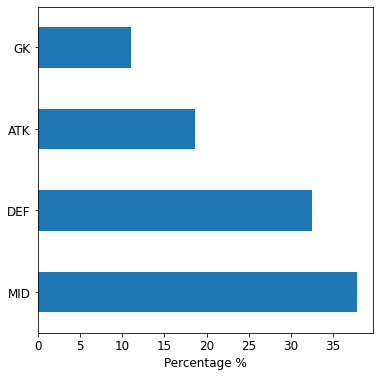

In [57]:
(min_df.position.value_counts(normalize=True) * 100).plot(kind='barh', figsize=(6, 6), fontsize=12)
plt.xlabel('Percentage %', fontsize=12);

In [58]:
minLabelEncode = LabelEncoder()
min_target = minLabelEncode.fit_transform(min_df.position)
min_target

array([0, 3, 0, ..., 3, 2, 3])

In [59]:
min_df.position = min_target
min_df

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,0,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,3,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,0,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,3,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,3,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,3,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,1,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,3,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


In [60]:
y = min_df.position
X = min_df.drop(columns=['rating', 'position'])

In [61]:
X_train_full , X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

In [63]:
y

fullName
C. Ronaldo dos Santos Aveiro    0
Luka Modrić                     3
Lionel Messi                    0
Edson Arantes Nascimento        3
Neymar da Silva Santos Jr.      3
                               ..
Guobo Liu                       3
Xin Wang                        1
Morgan Roberts                  3
Callum Hawkins                  2
Mads Frøkjær-Jensen             3
Name: position, Length: 15525, dtype: int64

### Tiền xử lý tập train

Với các biến định lượng thực hiện standardscaler(), với biến định tính foot thực hiện onehotenconding, biến atk và def sử dụng ordinalencoder

In [64]:
preprocessed_train_X = preprocess_pipeline.fit_transform(X_train)

In [65]:
preprocessed_train_X.shape

(9936, 44)

In [66]:
X_train.shape

(9936, 43)

### Tiền xử lý tập validation

In [67]:
preprocessed_valid_X = preprocess_pipeline.transform(X_valid)

In [68]:
preprocessed_valid_X.shape

(2484, 44)

In [69]:
X_valid.shape

(2484, 43)

### Bắt đầu quá trình train

In [70]:
classifier = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', random_state=0, max_iter=1000)
alphas = [0.01, 0.1, 1, 10, 100]
net_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('net', classifier)])
best_val_err = float('inf')
best_alpha = None
count = 0
for alp in alphas:
    net_pipeline['net'].set_params(alpha=alp)
    net_pipeline.fit(X_train, y_train)
    train_err = 1 - net_pipeline.score(X_train, y_train)
    valid_err = 1 - net_pipeline.score(X_valid, y_valid)
    if valid_err < best_val_err:
        best_val_err = valid_err
        best_alpha = alp
    count+=1
    print("Finish: ", count)
            
"Finish!"

Finish:  1
Finish:  2
Finish:  3
Finish:  4
Finish:  5


'Finish!'

In [71]:
net_pipeline['net'].set_params(alpha=best_alpha)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

In [72]:
net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['composure', 'height',
                                                   'weight', 'age',
                                                   'acceleration', 'aggression',
                                                   'agility', 'balance',
                                                   'ballcontrol', 'skillMoves',
                                                   'crossing', 'curve',
                                                   'dribbling', 'finishing',
                                                   'freekickaccuracy',
                                                   'gkdiving', 'gkhandling',
                                                   'gkkicking', 'gkpositioning',
                                                   'gkreflexes',
                                                   'headingaccuracy',
                                                   'interceptions', 'jumping',
                                                   'longpassing', 'longshots',
                                                   'marking', 'penalties',
                                                   'positioning', 'potential',
                                                   'reactions', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['foot']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['atkWorkRate',
                                                   'defWorkRate'])])),
                ('net',
                 MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000,
                               random_state=0))])

In [77]:
net_pipeline.score(X_test, y_test) # Result on MLPClassifier

0.8969404186795491

In [74]:
knn_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('knn', KNeighborsClassifier())])
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }
search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=params_knn, cv=5, return_train_score=True)

In [75]:
search_knn.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['composure',
                                                                          'height',
                                                                          'weight',
                                                                          'age',
                                                                          'acceleration',
                                                                          'aggression',
                                                                          'agility',
                                                                          'balance',
                                                                          'ballcontrol',
                                                                          'skillMoves',
                                                                          'crossing',
                                                                          'curve',
                                                                          'dribbling',
                                                                          'finishing',
                                                                          'freekickaccuracy',
                                                                          'gkdiving',
                                                                          'gkhandling',
                                                                          'gkkicking',
                                                                          'gkpositioning',
                                                                          'gkr...
                                                                          'interceptions',
                                                                          'jumping',
                                                                          'longpassing',
                                                                          'longshots',
                                                                          'marking',
                                                                          'penalties',
                                                                          'positioning',
                                                                          'potential',
                                                                          'reactions', ...]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['foot']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['atkWorkRate',
                                                                          'defWorkRate'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

In [76]:
print(f"Best score is {search_knn.best_score_} with best param {search_knn.best_params_}")

Best score is 0.877536231884058 with best param {'knn__n_neighbors': 18}
